In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tensorflow.python.client import device_lib
# GPU 인식 되었는지 확인
if not tf.config.list_physical_devices('GPU'):
    print('GPU is not detected!!!')
else:
    print('GPU detected!!!\n')
    print('Device type list:')
    print(device_lib.list_local_devices())

GPU detected!!!

Device type list:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5217086803621774992
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4850712576
locality {
  bus_id: 1
  links {
  }
}
incarnation: 315795799839755557
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [2]:
#모든 열 보기
pd.set_option('display.max_columns', None)

In [3]:
path = 'D:/Dataset/Competitons/Jeju/'
train = pd.read_csv(path + 'train.csv', parse_dates=["base_date"]).copy()
test = pd.read_csv(path + 'test.csv', parse_dates=['base_date'].copy())
origin_train = train.copy()
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


변수명,변수 설명
1. id,아이디
2. base_date,날짜
3. day_of_week,요일
4. base_hour,시간대
5. road_in_use,도로사용여부
6. lane_count,차로수
7. road_rating,도로등급
8. multi_linked,중용구간 여부
9. connect_code,연결로 코드
10. maximum_speed_limit,최고속도제한
11. weight_restricted,통과제한하중
12. hight_restricted,통과제한높이
13. road_type,도로유형
14. start_latitude,시작지점의 위도
15. start_longitude,시작지점의 경도
16. start_turn_restricted,시작 지점의 회전제한 유무
17. end_latitude,도착지점의 위도
18. end_longitude,도착지점의 경도
19. end_turn_restricted,도작지점의 회전제한 유무
20. road_name,도로명
21. start_node_name,시작지점명
22. end_node_name,도착지점명
23. vehicle_restricted,통과제한차량
24. target,평균속도(km)

https://www.law.go.kr/LSW/admRulInfoP.do?admRulSeq=2100000157569

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     object        
 1   base_date              datetime64[ns]
 2   day_of_week            object        
 3   base_hour              int64         
 4   lane_count             int64         
 5   road_rating            int64         
 6   road_name              object        
 7   multi_linked           int64         
 8   connect_code           int64         
 9   maximum_speed_limit    float64       
 10  vehicle_restricted     float64       
 11  weight_restricted      float64       
 12  height_restricted      float64       
 13  road_type              int64         
 14  start_node_name        object        
 15  start_latitude         float64       
 16  start_longitude        float64       
 17  start_turn_restricted  object        
 18  end_node_name         

In [5]:
train.head(5)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [6]:
def date_split(df):

    df['year'] = df['base_date'].dt.year
    df['month'] = df['base_date'].dt.month
    df['day'] = df['base_date'].dt.day
    df['quarter'] = df['base_date'].dt.quarter
    df['maximum_speed_limit - lane_count'] = df['maximum_speed_limit'] - df['lane_count']
    df['lane_count * base_hour'] = df['lane_count'] * df['base_hour']
    df['maximum_speed_limit - (lane_count * base_hour)'] = df['maximum_speed_limit'] - df['lane_count * base_hour']

    return df
    
train = date_split(train)
test = date_split(test)
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,maximum_speed_limit - (lane_count * base_hour)
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022,6,23,2,59.0,17,43.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022,7,28,3,58.0,42,18.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,2021,10,10,4,78.0,14,66.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,2022,3,11,1,48.0,26,24.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,2021,10,5,4,78.0,16,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0,2021,11,4,4,49.0,16,34.0
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0,2022,3,31,1,78.0,4,76.0
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0,2022,6,13,2,58.0,44,16.0
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0,2021,10,20,4,78.0,4,76.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 30 columns):
 #   Column                                          Dtype         
---  ------                                          -----         
 0   id                                              object        
 1   base_date                                       datetime64[ns]
 2   day_of_week                                     object        
 3   base_hour                                       int64         
 4   lane_count                                      int64         
 5   road_rating                                     int64         
 6   road_name                                       object        
 7   multi_linked                                    int64         
 8   connect_code                                    int64         
 9   maximum_speed_limit                             float64       
 10  vehicle_restricted                              float64       
 11

In [8]:
corr_matrix = train.corr()
corr_matrix['target'].sort_values(ascending=False)

target                                            1.000000
maximum_speed_limit - (lane_count * base_hour)    0.473003
maximum_speed_limit - lane_count                  0.442913
maximum_speed_limit                               0.425715
weight_restricted                                 0.294092
road_type                                         0.200840
connect_code                                      0.048348
start_latitude                                    0.036280
end_latitude                                      0.036139
month                                            -0.000225
end_longitude                                    -0.001000
start_longitude                                  -0.001168
multi_linked                                     -0.008408
quarter                                          -0.008418
day                                              -0.011605
year                                             -0.031676
lane_count                                       -0.1442

<AxesSubplot:>

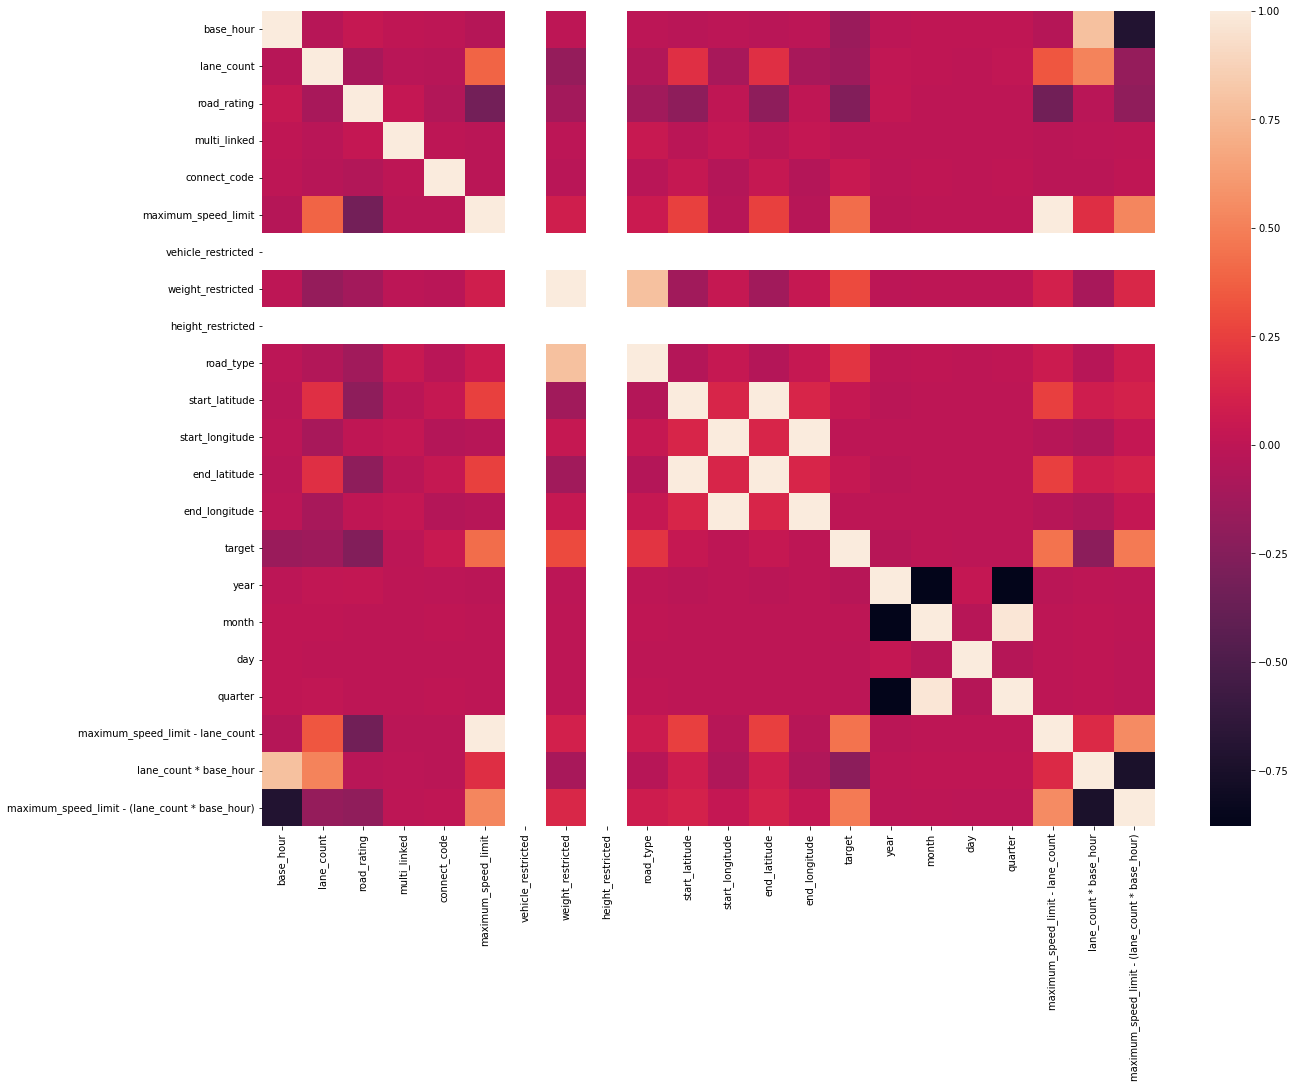

In [9]:
f, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(corr_matrix)

In [10]:
# from sklearn.ensemble import RandomForestRegressor
# X_train = train.drop(['id', 'base_date', 'target'], axis = 1)
# y_train = train['target'].copy()
# baseline_model = RandomForestRegressor(random_state = 42, verbose = 3)
# baseline_model.fit(X_train, y_train)

from catboost import CatBoostRegressor
X_train_cat = train.drop(['id', 'base_date', 'target', 'vehicle_restricted', 'height_restricted'], axis = 1)
y_train_cat = train['target'].copy()
cat_features = ['day_of_week', 'road_name', 'start_node_name', 'start_turn_restricted', 'end_node_name', 'end_turn_restricted']

In [11]:
num_cols = X_train_cat.columns[X_train_cat.dtypes != 'object'].to_list()

In [12]:
num_cols

['base_hour',
 'lane_count',
 'road_rating',
 'multi_linked',
 'connect_code',
 'maximum_speed_limit',
 'weight_restricted',
 'road_type',
 'start_latitude',
 'start_longitude',
 'end_latitude',
 'end_longitude',
 'year',
 'month',
 'day',
 'quarter',
 'maximum_speed_limit - lane_count',
 'lane_count * base_hour',
 'maximum_speed_limit - (lane_count * base_hour)']

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cat[num_cols])
test_scaled = scaler.transform(test[num_cols])

In [14]:
X_train_cat_scaled = X_train_cat.copy()
test_cat = test.copy()

X_train_cat_scaled[num_cols] = X_train_scaled
test_cat[num_cols] = test_scaled

In [15]:
X_train_cat_scaled

,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,maximum_speed_limit - (lane_count * base_hour)
0,목,0.754498,-1.216503,0.566000,지방도1112호선,-0.021829,-0.050886,-0.103292,1.919331,1.968826,제3교래교,0.429152,0.901272,없음,제3교래교,0.429179,0.899511,없음,0.804187,-0.079493,0.874433,-0.310622,-0.035052,-0.308759,0.196790
1,목,1.349551,0.237511,-1.064340,일반국도11호선,-0.021829,-0.050886,-0.103292,-0.402678,-0.507917,광양사거리,1.150320,0.047471,있음,KAL사거리,1.190706,0.029071,없음,0.804187,0.185615,1.426510,0.514382,-0.119182,1.308468,-1.200992
2,일,-0.733134,0.237511,-1.064340,일반국도16호선,-0.021829,-0.050886,1.545032,-0.402678,-0.507917,창고천교,-1.039228,-0.979027,없음,상창육교,-1.030152,-1.020437,없음,-1.243492,0.980939,-0.560966,1.339386,1.563412,-0.502827,1.482749
3,금,0.159445,0.237511,1.109446,태평로,-0.021829,-0.050886,-0.927454,-0.402678,-0.507917,남양리조트,-1.365944,0.291115,없음,서현주택,-1.371145,0.284828,없음,0.804187,-0.874818,-0.450551,-1.135625,-0.960478,0.273443,-0.865524
4,화,-0.584371,0.237511,-1.064340,일반국도12호선,-0.021829,-0.050886,1.545032,-0.402678,-0.507917,애월샷시,0.769731,-1.247926,없음,애월입구,0.774335,-1.225076,없음,-1.243492,0.980939,-1.113043,1.339386,1.563412,-0.373448,1.370926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,목,0.605735,-1.216503,1.109446,-,-0.021829,-0.050886,-0.927454,-0.402678,-0.507917,대림사거리,0.373791,-1.557627,없음,금덕해운,0.362039,-1.585812,없음,-1.243492,1.246047,-1.223458,1.339386,-0.876348,-0.373448,-0.306412
4701213,목,-1.476951,0.237511,1.109446,-,-0.021829,-0.050886,1.545032,2.693334,1.968826,광삼교,0.871416,-0.622360,없음,광삼교,0.871656,-0.619146,없음,0.804187,-0.874818,1.757756,-1.135625,1.563412,-1.149718,2.041861
4701214,월,1.498314,0.237511,-1.064340,일반국도12호선,-0.021829,-0.050886,-0.103292,-0.402678,-0.507917,고성교차로,0.621200,2.499876,없음,성산교차로,0.590966,2.502387,없음,0.804187,-0.079493,-0.229720,-0.310622,-0.119182,1.437847,-1.312814
4701215,수,-1.476951,0.237511,-1.064340,일반국도95호선,-0.021829,-0.050886,1.545032,-0.402678,-0.507917,제6광령교,0.585761,-0.574724,없음,관광대학입구,0.599615,-0.565155,없음,-1.243492,0.980939,0.543187,1.339386,1.563412,-1.149718,2.041861


In [16]:
X_train_cat_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 25 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   day_of_week                                     object 
 1   base_hour                                       float64
 2   lane_count                                      float64
 3   road_rating                                     float64
 4   road_name                                       object 
 5   multi_linked                                    float64
 6   connect_code                                    float64
 7   maximum_speed_limit                             float64
 8   weight_restricted                               float64
 9   road_type                                       float64
 10  start_node_name                                 object 
 11  start_latitude                                  float64
 12  start_longitude             

In [17]:
cat = CatBoostRegressor(random_state = 42, cat_features=cat_features, iterations = 2000)
cat.fit(X_train_cat_scaled, y_train_cat, verbose = True)

Learning rate set to 0.088644
0:	learn: 14.9754739	total: 1.63s	remaining: 54m 26s
1:	learn: 14.0957814	total: 3.06s	remaining: 50m 54s
2:	learn: 13.3134740	total: 4.1s	remaining: 45m 31s
3:	learn: 12.6270771	total: 5.33s	remaining: 44m 21s
4:	learn: 12.0220919	total: 6.43s	remaining: 42m 46s
5:	learn: 11.4963911	total: 7.51s	remaining: 41m 37s
6:	learn: 11.0388908	total: 8.71s	remaining: 41m 19s
7:	learn: 10.6363238	total: 9.82s	remaining: 40m 45s
8:	learn: 10.2242000	total: 11.1s	remaining: 40m 49s
9:	learn: 9.8503365	total: 12.4s	remaining: 41m
10:	learn: 9.5282125	total: 13.4s	remaining: 40m 17s
11:	learn: 9.2524004	total: 14.3s	remaining: 39m 32s
12:	learn: 9.0156925	total: 15.3s	remaining: 39m 1s
13:	learn: 8.8086458	total: 16.3s	remaining: 38m 36s
14:	learn: 8.6305410	total: 17.3s	remaining: 38m 13s
15:	learn: 8.4763214	total: 18.2s	remaining: 37m 32s
16:	learn: 8.3306917	total: 19s	remaining: 36m 57s
17:	learn: 8.2048959	total: 20.3s	remaining: 37m 11s
18:	learn: 8.0990817	tota

153:	learn: 6.2512011	total: 3m 23s	remaining: 40m 39s
154:	learn: 6.2487165	total: 3m 24s	remaining: 40m 38s
155:	learn: 6.2423300	total: 3m 26s	remaining: 40m 39s
156:	learn: 6.2385803	total: 3m 27s	remaining: 40m 39s
157:	learn: 6.2330833	total: 3m 29s	remaining: 40m 36s
158:	learn: 6.2282404	total: 3m 30s	remaining: 40m 35s
159:	learn: 6.2235407	total: 3m 31s	remaining: 40m 31s
160:	learn: 6.2195608	total: 3m 32s	remaining: 40m 28s
161:	learn: 6.2159272	total: 3m 34s	remaining: 40m 28s
162:	learn: 6.2119209	total: 3m 35s	remaining: 40m 26s
163:	learn: 6.2077331	total: 3m 36s	remaining: 40m 24s
164:	learn: 6.2027516	total: 3m 37s	remaining: 40m 23s
165:	learn: 6.1994154	total: 3m 39s	remaining: 40m 22s
166:	learn: 6.1961219	total: 3m 40s	remaining: 40m 22s
167:	learn: 6.1924159	total: 3m 42s	remaining: 40m 23s
168:	learn: 6.1882632	total: 3m 43s	remaining: 40m 22s
169:	learn: 6.1839115	total: 3m 45s	remaining: 40m 22s
170:	learn: 6.1793361	total: 3m 46s	remaining: 40m 21s
171:	learn

304:	learn: 5.8222676	total: 6m 44s	remaining: 37m 29s
305:	learn: 5.8209894	total: 6m 45s	remaining: 37m 26s
306:	learn: 5.8193361	total: 6m 46s	remaining: 37m 24s
307:	learn: 5.8165103	total: 6m 47s	remaining: 37m 19s
308:	learn: 5.8138640	total: 6m 48s	remaining: 37m 17s
309:	learn: 5.8130431	total: 6m 50s	remaining: 37m 16s
310:	learn: 5.8107765	total: 6m 51s	remaining: 37m 14s
311:	learn: 5.8085298	total: 6m 52s	remaining: 37m 13s
312:	learn: 5.8072531	total: 6m 54s	remaining: 37m 11s
313:	learn: 5.8047680	total: 6m 55s	remaining: 37m 9s
314:	learn: 5.8030786	total: 6m 56s	remaining: 37m 8s
315:	learn: 5.7996321	total: 6m 57s	remaining: 37m 6s
316:	learn: 5.7975570	total: 6m 59s	remaining: 37m 4s
317:	learn: 5.7962125	total: 7m	remaining: 37m 3s
318:	learn: 5.7944369	total: 7m 1s	remaining: 37m 1s
319:	learn: 5.7929579	total: 7m 2s	remaining: 37m
320:	learn: 5.7919299	total: 7m 4s	remaining: 36m 59s
321:	learn: 5.7889098	total: 7m 5s	remaining: 36m 57s
322:	learn: 5.7872276	total:

454:	learn: 5.5952396	total: 10m 4s	remaining: 34m 13s
455:	learn: 5.5941765	total: 10m 6s	remaining: 34m 12s
456:	learn: 5.5932929	total: 10m 7s	remaining: 34m 12s
457:	learn: 5.5926929	total: 10m 9s	remaining: 34m 12s
458:	learn: 5.5922996	total: 10m 11s	remaining: 34m 11s
459:	learn: 5.5911792	total: 10m 12s	remaining: 34m 11s
460:	learn: 5.5900980	total: 10m 14s	remaining: 34m 9s
461:	learn: 5.5889084	total: 10m 15s	remaining: 34m 9s
462:	learn: 5.5871090	total: 10m 17s	remaining: 34m 10s
463:	learn: 5.5848797	total: 10m 19s	remaining: 34m 10s
464:	learn: 5.5822264	total: 10m 21s	remaining: 34m 10s
465:	learn: 5.5809697	total: 10m 22s	remaining: 34m 9s
466:	learn: 5.5800252	total: 10m 24s	remaining: 34m 9s
467:	learn: 5.5795826	total: 10m 26s	remaining: 34m 9s
468:	learn: 5.5770451	total: 10m 27s	remaining: 34m 8s
469:	learn: 5.5756675	total: 10m 29s	remaining: 34m 8s
470:	learn: 5.5744549	total: 10m 30s	remaining: 34m 7s
471:	learn: 5.5723429	total: 10m 32s	remaining: 34m 7s
472:	

602:	learn: 5.4363914	total: 13m 52s	remaining: 32m 9s
603:	learn: 5.4358218	total: 13m 54s	remaining: 32m 8s
604:	learn: 5.4346800	total: 13m 55s	remaining: 32m 7s
605:	learn: 5.4328563	total: 13m 57s	remaining: 32m 6s
606:	learn: 5.4318243	total: 13m 58s	remaining: 32m 4s
607:	learn: 5.4315026	total: 14m	remaining: 32m 4s
608:	learn: 5.4302721	total: 14m 2s	remaining: 32m 3s
609:	learn: 5.4294343	total: 14m 3s	remaining: 32m 2s
610:	learn: 5.4283052	total: 14m 5s	remaining: 32m 1s
611:	learn: 5.4272872	total: 14m 6s	remaining: 32m
612:	learn: 5.4268350	total: 14m 8s	remaining: 31m 59s
613:	learn: 5.4261758	total: 14m 9s	remaining: 31m 58s
614:	learn: 5.4257081	total: 14m 11s	remaining: 31m 57s
615:	learn: 5.4251798	total: 14m 12s	remaining: 31m 55s
616:	learn: 5.4237648	total: 14m 13s	remaining: 31m 53s
617:	learn: 5.4232132	total: 14m 15s	remaining: 31m 52s
618:	learn: 5.4225291	total: 14m 16s	remaining: 31m 51s
619:	learn: 5.4217730	total: 14m 18s	remaining: 31m 50s
620:	learn: 5.4

750:	learn: 5.3293785	total: 17m 27s	remaining: 29m 2s
751:	learn: 5.3289268	total: 17m 29s	remaining: 29m 1s
752:	learn: 5.3284415	total: 17m 30s	remaining: 29m
753:	learn: 5.3275638	total: 17m 32s	remaining: 28m 59s
754:	learn: 5.3270837	total: 17m 34s	remaining: 28m 58s
755:	learn: 5.3266876	total: 17m 35s	remaining: 28m 57s
756:	learn: 5.3260168	total: 17m 37s	remaining: 28m 56s
757:	learn: 5.3255484	total: 17m 39s	remaining: 28m 55s
758:	learn: 5.3246512	total: 17m 40s	remaining: 28m 54s
759:	learn: 5.3232672	total: 17m 42s	remaining: 28m 52s
760:	learn: 5.3227626	total: 17m 43s	remaining: 28m 52s
761:	learn: 5.3220434	total: 17m 45s	remaining: 28m 51s
762:	learn: 5.3213254	total: 17m 47s	remaining: 28m 49s
763:	learn: 5.3209443	total: 17m 48s	remaining: 28m 48s
764:	learn: 5.3207093	total: 17m 49s	remaining: 28m 46s
765:	learn: 5.3198031	total: 17m 50s	remaining: 28m 45s
766:	learn: 5.3190359	total: 17m 52s	remaining: 28m 43s
767:	learn: 5.3180202	total: 17m 53s	remaining: 28m 42

898:	learn: 5.2439034	total: 21m 6s	remaining: 25m 51s
899:	learn: 5.2432219	total: 21m 8s	remaining: 25m 50s
900:	learn: 5.2428853	total: 21m 10s	remaining: 25m 49s
901:	learn: 5.2426097	total: 21m 11s	remaining: 25m 47s
902:	learn: 5.2418081	total: 21m 13s	remaining: 25m 46s
903:	learn: 5.2411675	total: 21m 14s	remaining: 25m 45s
904:	learn: 5.2404824	total: 21m 16s	remaining: 25m 44s
905:	learn: 5.2400684	total: 21m 18s	remaining: 25m 43s
906:	learn: 5.2395408	total: 21m 19s	remaining: 25m 42s
907:	learn: 5.2392087	total: 21m 21s	remaining: 25m 41s
908:	learn: 5.2386624	total: 21m 22s	remaining: 25m 39s
909:	learn: 5.2380964	total: 21m 24s	remaining: 25m 38s
910:	learn: 5.2377816	total: 21m 26s	remaining: 25m 37s
911:	learn: 5.2373567	total: 21m 28s	remaining: 25m 36s
912:	learn: 5.2365840	total: 21m 29s	remaining: 25m 35s
913:	learn: 5.2362558	total: 21m 31s	remaining: 25m 34s
914:	learn: 5.2358248	total: 21m 32s	remaining: 25m 32s
915:	learn: 5.2351608	total: 21m 34s	remaining: 25

1045:	learn: 5.1694636	total: 24m 28s	remaining: 22m 18s
1046:	learn: 5.1691378	total: 24m 29s	remaining: 22m 17s
1047:	learn: 5.1688926	total: 24m 30s	remaining: 22m 16s
1048:	learn: 5.1686522	total: 24m 32s	remaining: 22m 14s
1049:	learn: 5.1682655	total: 24m 33s	remaining: 22m 13s
1050:	learn: 5.1679604	total: 24m 34s	remaining: 22m 11s
1051:	learn: 5.1670852	total: 24m 36s	remaining: 22m 10s
1052:	learn: 5.1667560	total: 24m 37s	remaining: 22m 8s
1053:	learn: 5.1662081	total: 24m 38s	remaining: 22m 7s
1054:	learn: 5.1658298	total: 24m 40s	remaining: 22m 5s
1055:	learn: 5.1653851	total: 24m 41s	remaining: 22m 4s
1056:	learn: 5.1651425	total: 24m 42s	remaining: 22m 2s
1057:	learn: 5.1647690	total: 24m 43s	remaining: 22m 1s
1058:	learn: 5.1642995	total: 24m 45s	remaining: 21m 59s
1059:	learn: 5.1641525	total: 24m 46s	remaining: 21m 58s
1060:	learn: 5.1636531	total: 24m 47s	remaining: 21m 56s
1061:	learn: 5.1632878	total: 24m 48s	remaining: 21m 55s
1062:	learn: 5.1630486	total: 24m 50s

1190:	learn: 5.1146282	total: 27m 31s	remaining: 18m 42s
1191:	learn: 5.1138214	total: 27m 32s	remaining: 18m 40s
1192:	learn: 5.1135436	total: 27m 34s	remaining: 18m 38s
1193:	learn: 5.1133904	total: 27m 35s	remaining: 18m 37s
1194:	learn: 5.1129545	total: 27m 36s	remaining: 18m 35s
1195:	learn: 5.1127588	total: 27m 37s	remaining: 18m 34s
1196:	learn: 5.1124859	total: 27m 39s	remaining: 18m 33s
1197:	learn: 5.1122862	total: 27m 40s	remaining: 18m 31s
1198:	learn: 5.1120559	total: 27m 41s	remaining: 18m 30s
1199:	learn: 5.1115811	total: 27m 42s	remaining: 18m 28s
1200:	learn: 5.1112915	total: 27m 44s	remaining: 18m 27s
1201:	learn: 5.1110091	total: 27m 45s	remaining: 18m 25s
1202:	learn: 5.1107111	total: 27m 47s	remaining: 18m 24s
1203:	learn: 5.1104837	total: 27m 48s	remaining: 18m 23s
1204:	learn: 5.1101903	total: 27m 50s	remaining: 18m 21s
1205:	learn: 5.1098175	total: 27m 51s	remaining: 18m 20s
1206:	learn: 5.1095096	total: 27m 52s	remaining: 18m 19s
1207:	learn: 5.1093705	total: 2

1335:	learn: 5.0667830	total: 30m 37s	remaining: 15m 13s
1336:	learn: 5.0665305	total: 30m 38s	remaining: 15m 11s
1337:	learn: 5.0663544	total: 30m 39s	remaining: 15m 10s
1338:	learn: 5.0660212	total: 30m 40s	remaining: 15m 8s
1339:	learn: 5.0657215	total: 30m 42s	remaining: 15m 7s
1340:	learn: 5.0653977	total: 30m 43s	remaining: 15m 5s
1341:	learn: 5.0651995	total: 30m 44s	remaining: 15m 4s
1342:	learn: 5.0649287	total: 30m 46s	remaining: 15m 3s
1343:	learn: 5.0646016	total: 30m 47s	remaining: 15m 1s
1344:	learn: 5.0636937	total: 30m 48s	remaining: 15m
1345:	learn: 5.0633622	total: 30m 49s	remaining: 14m 58s
1346:	learn: 5.0628972	total: 30m 50s	remaining: 14m 57s
1347:	learn: 5.0627684	total: 30m 52s	remaining: 14m 55s
1348:	learn: 5.0625891	total: 30m 53s	remaining: 14m 54s
1349:	learn: 5.0620694	total: 30m 54s	remaining: 14m 53s
1350:	learn: 5.0618454	total: 30m 56s	remaining: 14m 51s
1351:	learn: 5.0613706	total: 30m 57s	remaining: 14m 50s
1352:	learn: 5.0612104	total: 30m 58s	rem

1480:	learn: 5.0201274	total: 33m 41s	remaining: 11m 48s
1481:	learn: 5.0199221	total: 33m 42s	remaining: 11m 46s
1482:	learn: 5.0195307	total: 33m 43s	remaining: 11m 45s
1483:	learn: 5.0193006	total: 33m 44s	remaining: 11m 44s
1484:	learn: 5.0190153	total: 33m 46s	remaining: 11m 42s
1485:	learn: 5.0187363	total: 33m 47s	remaining: 11m 41s
1486:	learn: 5.0184544	total: 33m 48s	remaining: 11m 39s
1487:	learn: 5.0182247	total: 33m 49s	remaining: 11m 38s
1488:	learn: 5.0177917	total: 33m 50s	remaining: 11m 36s
1489:	learn: 5.0176144	total: 33m 52s	remaining: 11m 35s
1490:	learn: 5.0173942	total: 33m 53s	remaining: 11m 34s
1491:	learn: 5.0172060	total: 33m 54s	remaining: 11m 32s
1492:	learn: 5.0169974	total: 33m 56s	remaining: 11m 31s
1493:	learn: 5.0169290	total: 33m 57s	remaining: 11m 30s
1494:	learn: 5.0168018	total: 33m 58s	remaining: 11m 28s
1495:	learn: 5.0162177	total: 33m 59s	remaining: 11m 27s
1496:	learn: 5.0159285	total: 34m 1s	remaining: 11m 25s
1497:	learn: 5.0155554	total: 34

1626:	learn: 4.9867102	total: 36m 45s	remaining: 8m 25s
1627:	learn: 4.9864532	total: 36m 46s	remaining: 8m 24s
1628:	learn: 4.9863235	total: 36m 48s	remaining: 8m 22s
1629:	learn: 4.9861139	total: 36m 49s	remaining: 8m 21s
1630:	learn: 4.9856924	total: 36m 50s	remaining: 8m 20s
1631:	learn: 4.9853765	total: 36m 52s	remaining: 8m 18s
1632:	learn: 4.9851874	total: 36m 53s	remaining: 8m 17s
1633:	learn: 4.9850259	total: 36m 54s	remaining: 8m 16s
1634:	learn: 4.9845267	total: 36m 55s	remaining: 8m 14s
1635:	learn: 4.9844338	total: 36m 57s	remaining: 8m 13s
1636:	learn: 4.9841747	total: 36m 58s	remaining: 8m 11s
1637:	learn: 4.9839165	total: 36m 59s	remaining: 8m 10s
1638:	learn: 4.9837965	total: 37m 1s	remaining: 8m 9s
1639:	learn: 4.9829830	total: 37m 2s	remaining: 8m 7s
1640:	learn: 4.9828085	total: 37m 3s	remaining: 8m 6s
1641:	learn: 4.9826152	total: 37m 4s	remaining: 8m 5s
1642:	learn: 4.9824087	total: 37m 6s	remaining: 8m 3s
1643:	learn: 4.9822208	total: 37m 7s	remaining: 8m 2s
1644

1774:	learn: 4.9555198	total: 39m 55s	remaining: 5m 3s
1775:	learn: 4.9553487	total: 39m 57s	remaining: 5m 2s
1776:	learn: 4.9550677	total: 39m 58s	remaining: 5m
1777:	learn: 4.9549746	total: 39m 59s	remaining: 4m 59s
1778:	learn: 4.9548418	total: 40m	remaining: 4m 58s
1779:	learn: 4.9545200	total: 40m 1s	remaining: 4m 56s
1780:	learn: 4.9544105	total: 40m 2s	remaining: 4m 55s
1781:	learn: 4.9542269	total: 40m 4s	remaining: 4m 54s
1782:	learn: 4.9538098	total: 40m 5s	remaining: 4m 52s
1783:	learn: 4.9537161	total: 40m 6s	remaining: 4m 51s
1784:	learn: 4.9535047	total: 40m 8s	remaining: 4m 50s
1785:	learn: 4.9532806	total: 40m 9s	remaining: 4m 48s
1786:	learn: 4.9531938	total: 40m 10s	remaining: 4m 47s
1787:	learn: 4.9530376	total: 40m 12s	remaining: 4m 46s
1788:	learn: 4.9529274	total: 40m 13s	remaining: 4m 44s
1789:	learn: 4.9527556	total: 40m 14s	remaining: 4m 43s
1790:	learn: 4.9526211	total: 40m 15s	remaining: 4m 41s
1791:	learn: 4.9524019	total: 40m 17s	remaining: 4m 40s
1792:	lea

1922:	learn: 4.9262645	total: 43m 1s	remaining: 1m 43s
1923:	learn: 4.9260901	total: 43m 3s	remaining: 1m 42s
1924:	learn: 4.9258459	total: 43m 4s	remaining: 1m 40s
1925:	learn: 4.9257348	total: 43m 5s	remaining: 1m 39s
1926:	learn: 4.9256096	total: 43m 6s	remaining: 1m 38s
1927:	learn: 4.9253054	total: 43m 8s	remaining: 1m 36s
1928:	learn: 4.9251300	total: 43m 9s	remaining: 1m 35s
1929:	learn: 4.9249373	total: 43m 10s	remaining: 1m 33s
1930:	learn: 4.9245809	total: 43m 12s	remaining: 1m 32s
1931:	learn: 4.9244351	total: 43m 13s	remaining: 1m 31s
1932:	learn: 4.9242726	total: 43m 14s	remaining: 1m 29s
1933:	learn: 4.9241899	total: 43m 15s	remaining: 1m 28s
1934:	learn: 4.9239903	total: 43m 17s	remaining: 1m 27s
1935:	learn: 4.9237540	total: 43m 18s	remaining: 1m 25s
1936:	learn: 4.9234539	total: 43m 19s	remaining: 1m 24s
1937:	learn: 4.9233590	total: 43m 21s	remaining: 1m 23s
1938:	learn: 4.9232403	total: 43m 22s	remaining: 1m 21s
1939:	learn: 4.9230597	total: 43m 23s	remaining: 1m 20s

In [18]:
test_model_cat = test_cat.drop(['id', 'base_date', 'vehicle_restricted', 'height_restricted'], axis = 1)
pred_cat = cat.predict(test_model_cat)

Text(0.5, 1.0, 'Feature Importance')

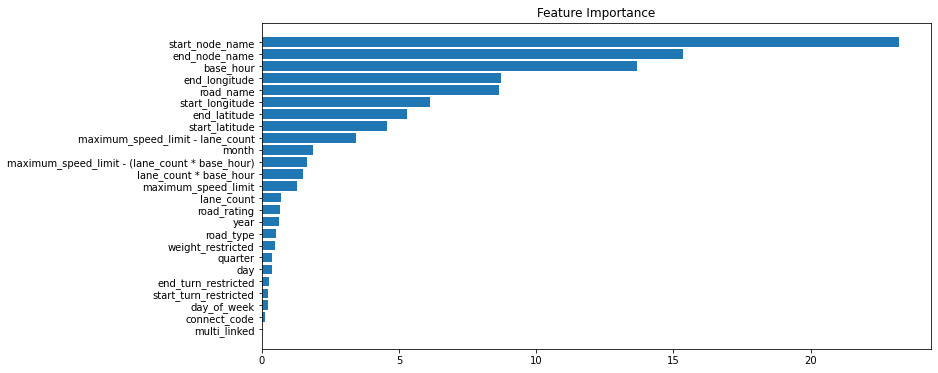

In [19]:
feature_importance = cat.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train_cat_scaled.columns)[sorted_idx])
plt.title('Feature Importance')

In [20]:
pred_cat

array([24.78657834, 44.53822534, 62.91127948, ..., 23.01855375,
       23.76822831, 45.61767296])

In [21]:
output = pd.DataFrame({'id' : test.id, 'target':pred_cat})
output.to_csv('cat.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [22]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
train_label = train.copy()
test_label = test.copy()

for i in cat_features:
    label = LabelEncoder()
    train_label[i] = label.fit_transform(train_label[i])
    test_label[i] = label.transform(test_label[i])

train_label

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,maximum_speed_limit - (lane_count * base_hour)
0,TRAIN_0000000,2022-06-23,1,17,1,106,46,0,0,60.0,0.0,32400.0,0.0,3,386,33.427747,126.662612,0,386,33.427749,126.662335,0,52.0,2022,6,23,2,59.0,17,43.0
1,TRAIN_0000001,2022-07-28,1,21,2,103,34,0,0,60.0,0.0,0.0,0.0,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,30.0,2022,7,28,3,58.0,42,18.0
2,TRAIN_0000002,2021-10-10,4,7,2,103,36,0,0,80.0,0.0,0.0,0.0,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,61.0,2021,10,10,4,78.0,14,66.0
3,TRAIN_0000003,2022-03-11,0,13,2,107,57,0,0,50.0,0.0,0.0,0.0,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,20.0,2022,3,11,1,48.0,26,24.0
4,TRAIN_0000004,2021-10-05,6,8,2,103,35,0,0,80.0,0.0,0.0,0.0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,38.0,2021,10,5,4,78.0,16,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,1,16,1,107,0,0,0,50.0,0.0,0.0,0.0,0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,20.0,2021,11,4,4,49.0,16,34.0
4701213,TRAIN_4701213,2022-03-31,1,2,2,107,0,0,0,80.0,0.0,43200.0,0.0,3,31,33.472505,126.424368,0,31,33.472525,126.424890,0,65.0,2022,3,31,1,78.0,4,76.0
4701214,TRAIN_4701214,2022-06-13,3,22,2,103,35,0,0,60.0,0.0,0.0,0.0,0,19,33.447183,126.912579,0,214,33.444121,126.912948,0,30.0,2022,6,13,2,58.0,44,16.0
4701215,TRAIN_4701215,2021-10-20,2,2,2,103,37,0,0,80.0,0.0,0.0,0.0,0,392,33.443596,126.431817,0,23,33.444996,126.433332,0,73.0,2021,10,20,4,78.0,4,76.0


In [23]:
from xgboost import XGBRegressor
X_train_label = train_label.drop(['id', 'base_date', 'target', 'vehicle_restricted', 'height_restricted'], axis = 1)
y_train_label = train_label['target'].copy()
X_train_label

,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,maximum_speed_limit - (lane_count * base_hour)
0,1,17,1,106,46,0,0,60.0,32400.0,3,386,33.427747,126.662612,0,386,33.427749,126.662335,0,2022,6,23,2,59.0,17,43.0
1,1,21,2,103,34,0,0,60.0,0.0,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,2022,7,28,3,58.0,42,18.0
2,4,7,2,103,36,0,0,80.0,0.0,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,2021,10,10,4,78.0,14,66.0
3,0,13,2,107,57,0,0,50.0,0.0,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,2022,3,11,1,48.0,26,24.0
4,6,8,2,103,35,0,0,80.0,0.0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,2021,10,5,4,78.0,16,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,1,16,1,107,0,0,0,50.0,0.0,0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,2021,11,4,4,49.0,16,34.0
4701213,1,2,2,107,0,0,0,80.0,43200.0,3,31,33.472505,126.424368,0,31,33.472525,126.424890,0,2022,3,31,1,78.0,4,76.0
4701214,3,22,2,103,35,0,0,60.0,0.0,0,19,33.447183,126.912579,0,214,33.444121,126.912948,0,2022,6,13,2,58.0,44,16.0
4701215,2,2,2,103,37,0,0,80.0,0.0,0,392,33.443596,126.431817,0,23,33.444996,126.433332,0,2021,10,20,4,78.0,4,76.0


In [24]:
xgb = XGBRegressor(random_state = 42)
xgb.fit(X_train_label, y_train_label)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [25]:
XGB_param_grid = {
    'n_estimators' : [800, 1000],
    'eta' : [0.1, 0.2, 0.3],
#     'alpha' : [0, 1, 2],
    'min_child_weight' : [1, 2, 3],
#     'gamma' : [0, 0.1, 0.01],
    'subsample' : [0.7, 0.9],
    'colsample_bytree' : [0.7, 0.9]
#     'max_depth' : [3, 5, 7, 9]
}

In [26]:
from sklearn.model_selection import GridSearchCV
grid_xgb = GridSearchCV(xgb, param_grid = XGB_param_grid, cv = 5, verbose = 3)
grid_xgb.fit(X_train_label, y_train_label)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END colsample_bytree=0.7, eta=0.1, min_child_weight=1, n_estimators=800, subsample=0.7;, score=0.916 total time= 6.3min
[CV 2/5] END colsample_bytree=0.7, eta=0.1, min_child_weight=1, n_estimators=800, subsample=0.7;, score=0.916 total time= 6.3min
[CV 3/5] END colsample_bytree=0.7, eta=0.1, min_child_weight=1, n_estimators=800, subsample=0.7;, score=0.916 total time= 6.2min
[CV 4/5] END colsample_bytree=0.7, eta=0.1, min_child_weight=1, n_estimators=800, subsample=0.7;, score=0.916 total time= 6.3min
[CV 5/5] END colsample_bytree=0.7, eta=0.1, min_child_weight=1, n_estimators=800, subsample=0.7;, score=0.917 total time= 6.3min
[CV 1/5] END colsample_bytree=0.7, eta=0.1, min_child_weight=1, n_estimators=800, subsample=0.9;, score=0.917 total time= 6.2min
[CV 2/5] END colsample_bytree=0.7, eta=0.1, min_child_weight=1, n_estimators=800, subsample=0.9;, score=0.917 total time= 6.2min
[CV 3/5] END colsample_bytree=0.7, 

[CV 4/5] END colsample_bytree=0.7, eta=0.2, min_child_weight=1, n_estimators=800, subsample=0.7;, score=0.916 total time= 6.3min
[CV 5/5] END colsample_bytree=0.7, eta=0.2, min_child_weight=1, n_estimators=800, subsample=0.7;, score=0.917 total time= 6.3min
[CV 1/5] END colsample_bytree=0.7, eta=0.2, min_child_weight=1, n_estimators=800, subsample=0.9;, score=0.917 total time= 6.2min
[CV 2/5] END colsample_bytree=0.7, eta=0.2, min_child_weight=1, n_estimators=800, subsample=0.9;, score=0.917 total time= 6.2min
[CV 3/5] END colsample_bytree=0.7, eta=0.2, min_child_weight=1, n_estimators=800, subsample=0.9;, score=0.917 total time= 6.2min
[CV 4/5] END colsample_bytree=0.7, eta=0.2, min_child_weight=1, n_estimators=800, subsample=0.9;, score=0.917 total time= 6.2min
[CV 5/5] END colsample_bytree=0.7, eta=0.2, min_child_weight=1, n_estimators=800, subsample=0.9;, score=0.917 total time= 6.2min
[CV 1/5] END colsample_bytree=0.7, eta=0.2, min_child_weight=1, n_estimators=1000, subsample=0.7;

[CV 3/5] END colsample_bytree=0.7, eta=0.3, min_child_weight=1, n_estimators=800, subsample=0.9;, score=0.917 total time= 6.4min
[CV 4/5] END colsample_bytree=0.7, eta=0.3, min_child_weight=1, n_estimators=800, subsample=0.9;, score=0.917 total time= 6.2min
[CV 5/5] END colsample_bytree=0.7, eta=0.3, min_child_weight=1, n_estimators=800, subsample=0.9;, score=0.917 total time= 6.2min
[CV 1/5] END colsample_bytree=0.7, eta=0.3, min_child_weight=1, n_estimators=1000, subsample=0.7;, score=0.917 total time= 7.8min
[CV 2/5] END colsample_bytree=0.7, eta=0.3, min_child_weight=1, n_estimators=1000, subsample=0.7;, score=0.917 total time= 7.8min
[CV 3/5] END colsample_bytree=0.7, eta=0.3, min_child_weight=1, n_estimators=1000, subsample=0.7;, score=0.917 total time= 7.8min
[CV 4/5] END colsample_bytree=0.7, eta=0.3, min_child_weight=1, n_estimators=1000, subsample=0.7;, score=0.917 total time= 7.8min
[CV 5/5] END colsample_bytree=0.7, eta=0.3, min_child_weight=1, n_estimators=1000, subsample=

[CV 2/5] END colsample_bytree=0.9, eta=0.1, min_child_weight=1, n_estimators=1000, subsample=0.7;, score=0.917 total time= 8.1min
[CV 3/5] END colsample_bytree=0.9, eta=0.1, min_child_weight=1, n_estimators=1000, subsample=0.7;, score=0.918 total time= 8.2min
[CV 4/5] END colsample_bytree=0.9, eta=0.1, min_child_weight=1, n_estimators=1000, subsample=0.7;, score=0.918 total time= 8.1min
[CV 5/5] END colsample_bytree=0.9, eta=0.1, min_child_weight=1, n_estimators=1000, subsample=0.7;, score=0.918 total time= 8.1min
[CV 1/5] END colsample_bytree=0.9, eta=0.1, min_child_weight=1, n_estimators=1000, subsample=0.9;, score=0.918 total time= 8.0min
[CV 2/5] END colsample_bytree=0.9, eta=0.1, min_child_weight=1, n_estimators=1000, subsample=0.9;, score=0.919 total time= 7.9min
[CV 3/5] END colsample_bytree=0.9, eta=0.1, min_child_weight=1, n_estimators=1000, subsample=0.9;, score=0.919 total time= 7.7min
[CV 4/5] END colsample_bytree=0.9, eta=0.1, min_child_weight=1, n_estimators=1000, subsamp

[CV 1/5] END colsample_bytree=0.9, eta=0.2, min_child_weight=1, n_estimators=1000, subsample=0.9;, score=0.918 total time= 7.6min
[CV 2/5] END colsample_bytree=0.9, eta=0.2, min_child_weight=1, n_estimators=1000, subsample=0.9;, score=0.919 total time= 7.8min
[CV 3/5] END colsample_bytree=0.9, eta=0.2, min_child_weight=1, n_estimators=1000, subsample=0.9;, score=0.919 total time= 7.7min
[CV 4/5] END colsample_bytree=0.9, eta=0.2, min_child_weight=1, n_estimators=1000, subsample=0.9;, score=0.918 total time= 7.7min
[CV 5/5] END colsample_bytree=0.9, eta=0.2, min_child_weight=1, n_estimators=1000, subsample=0.9;, score=0.919 total time= 7.7min
[CV 1/5] END colsample_bytree=0.9, eta=0.2, min_child_weight=2, n_estimators=800, subsample=0.7;, score=0.916 total time= 6.2min
[CV 2/5] END colsample_bytree=0.9, eta=0.2, min_child_weight=2, n_estimators=800, subsample=0.7;, score=0.916 total time= 6.2min
[CV 3/5] END colsample_bytree=0.9, eta=0.2, min_child_weight=2, n_estimators=800, subsample=

[CV 5/5] END colsample_bytree=0.9, eta=0.3, min_child_weight=1, n_estimators=1000, subsample=0.9;, score=0.919 total time= 7.7min
[CV 1/5] END colsample_bytree=0.9, eta=0.3, min_child_weight=2, n_estimators=800, subsample=0.7;, score=0.916 total time= 6.2min
[CV 2/5] END colsample_bytree=0.9, eta=0.3, min_child_weight=2, n_estimators=800, subsample=0.7;, score=0.916 total time= 6.3min
[CV 3/5] END colsample_bytree=0.9, eta=0.3, min_child_weight=2, n_estimators=800, subsample=0.7;, score=0.917 total time= 6.2min
[CV 4/5] END colsample_bytree=0.9, eta=0.3, min_child_weight=2, n_estimators=800, subsample=0.7;, score=0.917 total time= 6.3min
[CV 5/5] END colsample_bytree=0.9, eta=0.3, min_child_weight=2, n_estimators=800, subsample=0.7;, score=0.917 total time= 6.3min
[CV 1/5] END colsample_bytree=0.9, eta=0.3, min_child_weight=2, n_estimators=800, subsample=0.9;, score=0.917 total time= 6.2min
[CV 2/5] END colsample_bytree=0.9, eta=0.3, min_child_weight=2, n_estimators=800, subsample=0.9;

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...elta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=42,
                                    reg_alpha=0, reg_lambda=1, ...),
             param_grid={'colsample_bytree': [0.7, 0.9], 'eta': [0.1, 0.2, 0.3],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [800, 1000], 'subsample': [0.7, 0.9]},
             verbose=3)

In [27]:
print(grid_xgb.best_params_)

{'colsample_bytree': 0.9, 'eta': 0.1, 'min_child_weight': 3, 'n_estimators': 1000, 'subsample': 0.9}


In [28]:
xgb_grid = XGBRegressor(random_state = 42, n_estimators = grid_xgb.best_params_['n_estimators'],
                             eta = grid_xgb.best_params_['eta'],
#                              gamma = grid_xgb.best_params_['gamma'],
#                              alpha = grid_xgb.best_params_['alpha'],
#                              max_depth = grid_xgb.best_params_['max_depth'],
                             min_child_weight = grid_xgb.best_params_['min_child_weight'],
                             subsample = grid_xgb.best_params_['subsample'],
                             colsample_bytree = grid_xgb.best_params_['colsample_bytree'])

In [29]:
xgb_grid.fit(X_train_label, y_train_label)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, ...)

In [30]:
test_xgb = test_label.drop(['id', 'base_date', 'vehicle_restricted', 'height_restricted'], axis = 1)
pred_xgb = xgb_grid.predict(test_xgb)

In [31]:
pred_xgb

array([24.072594, 44.163704, 64.28325 , ..., 21.777271, 22.807539,
       47.10233 ], dtype=float32)

Text(0.5, 1.0, 'Feature Importance')

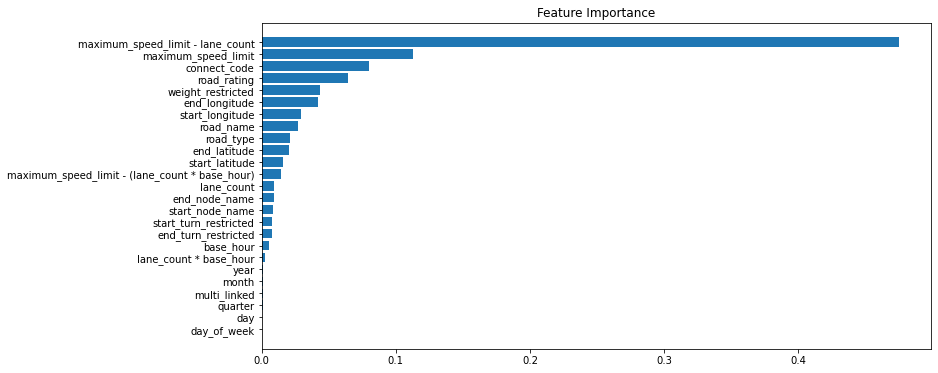

In [32]:
feature_importance = xgb_grid.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(test_xgb.columns)[sorted_idx])
plt.title('Feature Importance')

In [33]:
output = pd.DataFrame({'id' : test.id, 'target':pred_xgb})
output.to_csv('xgb_grid.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [34]:
# from sklearn.preprocessing import StandardScaler

# train_label_drop = train_label.drop(['id', 'base_date', 'target', 'vehicle_restricted', 'height_restricted'], axis = 1)
# test_label_drop = test_label.drop(['id', 'base_date', 'vehicle_restricted', 'height_restricted'], axis = 1)

# scaler = StandardScaler()
# scaler.fit(train_label_drop)

# train_label_scaler = scaler.transform(train_label_drop)
# test_label_scaler = scaler.transform(test_label_drop)

In [35]:
# train_label_scaler